
# Advertising 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
#import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
!ls

Advertising.ipynb
Logistic Regression Project - Solutions.ipynb
Logistic Regression with Python.ipynb
advertising.csv
titanic_test.csv
titanic_train.csv


In [2]:
def load_data(path):
    return pd.read_csv(path)

In [4]:
data=load_data("advertising.csv")

**Check the head of ad_data**

In [5]:
#top 5 rows
data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [6]:
#description of dataset
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Well here we check the stats value of dataset. We know how much data is scattered and what is the mean, max and min values of each features.

In [7]:
#information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

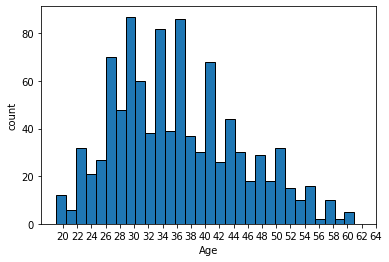

In [8]:
plt.hist(data['Age'], bins=30, ec='k')
plt.xlabel("Age")
plt.ylabel("count")
plt.xticks(range(20,65,2))
plt.show()

Mostly customers age are between 22 to 42. Thses customers are clicked on advertisement.

**Create a jointplot showing Area Income versus Age.**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


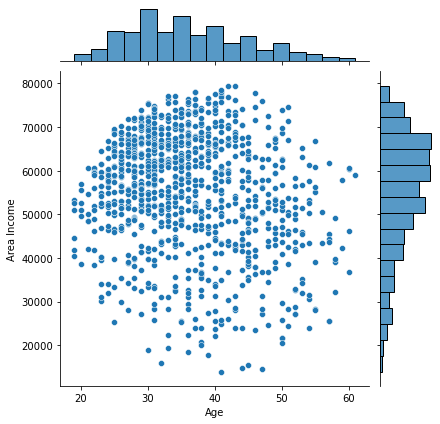

In [9]:
sns.jointplot('Age','Area Income', data=data)
plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

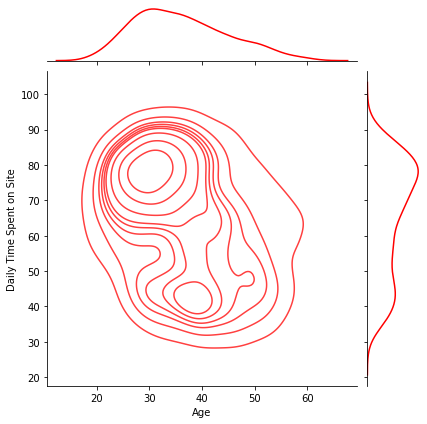

In [10]:
sns.jointplot(x="Age",y="Daily Time Spent on Site", data=data, kind='kde', color="red", alpha=0.75 )
plt.show()

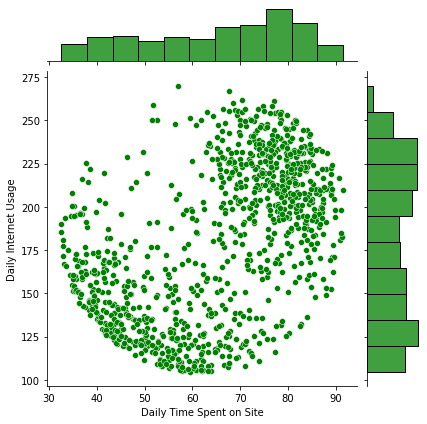

In [36]:
sns.jointplot(x="Daily Time Spent on Site", y="Daily Internet Usage", data=data, color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

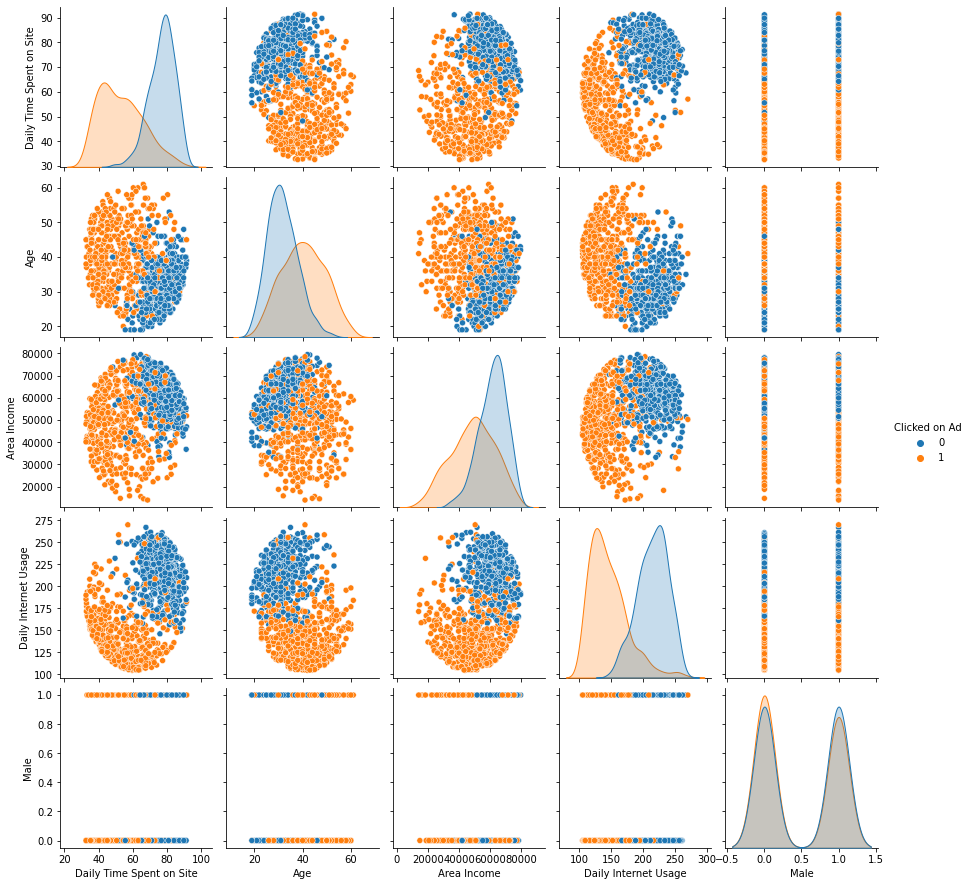

In [11]:
sns.pairplot(data, hue="Clicked on Ad")

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=data[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y=data["Clicked on Ad"]

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [16]:
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
pred_train=lr.predict(x_train)
pred_train[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [30]:
y_train.ravel()[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [32]:
print(" Training Dataset:")
print("Classification Report : \n", classification_report(y_train, pred_train))

 Training Dataset:
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       411
           1       0.92      0.87      0.89       389

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [38]:
print("confusion matrix: \n", confusion_matrix(y_train, pred_train))
print("accuracy score: ", accuracy_score(y_train, pred_train)*100)
print("precision score: ", precision_score(y_train, pred_train)*100)
print("recall score :",recall_score(y_train, pred_train)*100)

confusion matrix: 
 [[382  29]
 [ 51 338]]
accuracy score:  90.0
precision score:  92.09809264305177
recall score : 86.88946015424165


Accuracy is 90%, not bad!
Recall is less and precision is high. This is not a case of sensitivity so precision is matter in this case.
To check the overfitting we need to check the score of test dataset.

## Predictions and Evaluations
** Now predict values for the testing data.**

In [26]:
pred_test=lr.predict(x_test)

In [39]:
print("Predicted Values: ", pred_test[:20])

Predicted Values:  [0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1]


In [40]:
print("Actual Values: ", *y_test[:20])

Actual Values:  1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1


** Create a classification report for the model.**

In [41]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [43]:
print("Confusion Matrix: \n",confusion_matrix(y_test, pred_test))
print("Accuracy Score: ", accuracy_score(y_test, pred_test)*100)
print("Precision Score: ", precision_score(y_test, pred_test)*100)
print("Recall Score :", recall_score(y_test, pred_test)*100)

Confusion Matrix: 
 [[85  4]
 [16 95]]
Accuracy Score:  90.0
Precision Score:  95.95959595959596
Recall Score : 85.58558558558559


Well there is 3% difference between train and test precision score. There is very few chances of overfitting we can ignore it.

we need to draw ROC curve, for ROC curve we need to find probability of wether or not they clicked on an advertisement.

In [47]:
pred_test_prob=lr.predict_proba(x_test)[:,1]
pred_test_prob.ravel()[:10]

array([0.49818822, 0.99672388, 0.94951848, 0.98954807, 0.03204768,
       0.28906537, 0.02483548, 0.99025509, 0.31269028, 0.94659168])

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

In [49]:
fpr, tpr, thresold=roc_curve(y_test, pred_test_prob)

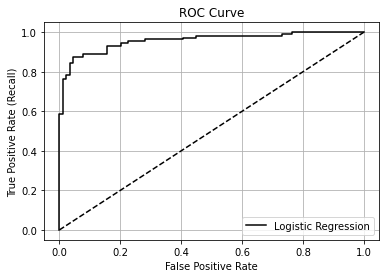

In [50]:
plt.plot(fpr, tpr,'k', label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.grid()
plt.title("ROC Curve")
plt.show()

In [51]:
lg_auc_score = roc_auc_score(y_test, pred_test_prob)
lg_auc_score

0.9577892499240814

Predictive performance is quite good i.e. 0.95. It can range from 0.5 to 1, and the larger it is the better.

## Great Job!